In [1]:
import rasterio

mars = rasterio.open('../../Planets/mars/data/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif')
mars = mars.read()

In [35]:
print(np.amin(mars[0]))
print(np.amax(mars[0]))
print(np.amax(mars[0]) + abs(np.amin(mars[0])))

-8201
21241
29442


In [3]:
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import numpy as np

custom_cmap = LinearSegmentedColormap.from_list('mars', ['#162252',
                                                         '#104E8B',
                                                         '#00B2EE',
                                                         '#00FF00', 
                                                         '#FFFF00',
                                                         '#FFA500',
                                                         '#FF0000', 
                                                         '#8b0000',
                                                         '#964B00', 
                                                         '#808080',
                                                         '#FFFFFF'], N=2350)

bounds = np.arange(-9500, 14000, 10)
norm = BoundaryNorm(bounds, custom_cmap.N)

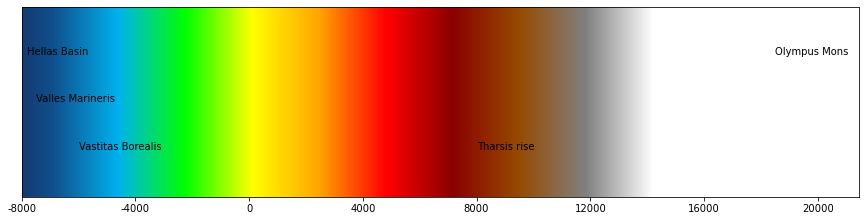

In [4]:
import matplotlib.pyplot as plt

x = np.arange(np.amin(mars[0]), np.amax(mars[0]), 1)
gradient = np.vstack((x, x))

fig, ax = plt.subplots()
fig.set_size_inches(15, 3.5)
plt.imshow(gradient, aspect='auto', cmap=custom_cmap, norm=norm)
plt.text(201, 0, "Hellas Basin")
plt.text(26500, 0, "Olympus Mons")
plt.text(2000, 1, "Vastitas Borealis")
plt.text(16000, 1, "Tharsis rise")
plt.text(501, 0.5, "Valles Marineris")

plt.xticks(ticks=np.arange(0, 30000, 4000), labels=np.arange(-8000, 22000, 4000))
ax.get_yaxis().set_visible(False)
plt.show()

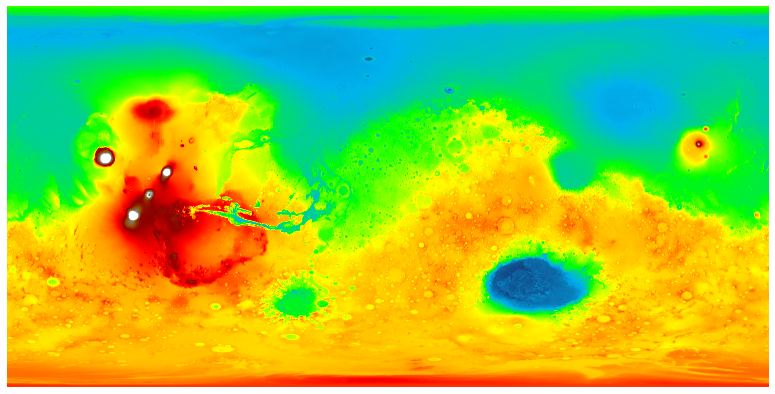

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

imgs = plt.imshow(mars[0], cmap=custom_cmap, norm=norm)
ax.axis('off')

plt.show()

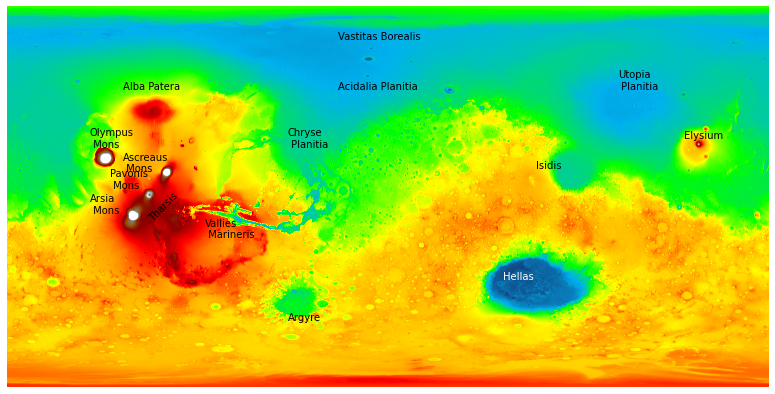

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

imgs = plt.imshow(mars[0], cmap=custom_cmap, norm=norm)
plt.text(5000, 8400, "Olympus\n Mons")
plt.text(7000, 10000, "Ascreaus\n Mons")
plt.text(6200, 11500, "Pavonis\n Mons")
plt.text(5000, 13000, "Arsia\n Mons")
plt.text(8500, 13000, "Tharsis", rotation=45)
plt.text(12000, 14000, "Vallies\n Marineris")
plt.text(17000, 18000, "Argyre")
plt.text(20000, 2000, "Vastitas Borealis")
plt.text(17000, 8500, "Chryse\n Planitia")
plt.text(20000, 5000, "Acidalia Planitia")
plt.text(30000, 16500, "Hellas", color='white')
plt.text(37000, 5000, "Utopia\n Planitia")
plt.text(41000, 8000, "Elysium")
plt.text(34000, 9800, "Isidis")
plt.text(7000, 5000, "Alba Patera")
ax.axis('off')

plt.show()

In [7]:
colors_undersea = plt.cm.ocean(np.linspace(0.2, 0.8, 950))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 1400))

colors = np.vstack((colors_undersea, colors_land))
terrain_map = LinearSegmentedColormap.from_list('cut_terrain', colors, N=2350)

bounds = np.arange(-9500, 14000, 10)
norm = BoundaryNorm(bounds, terrain_map.N)

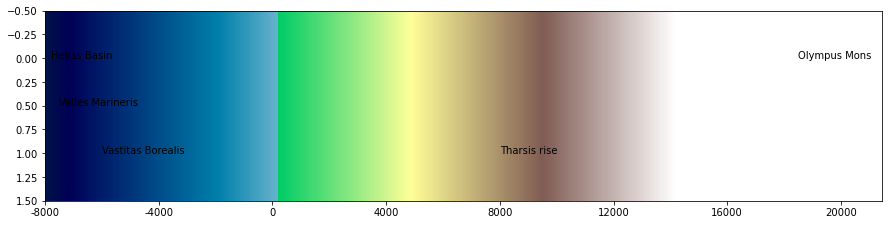

In [9]:
x = np.arange(np.amin(mars[0]), np.amax(mars[0]), 1)
gradient = np.vstack((x, x))

fig, ax = plt.subplots()
fig.set_size_inches(15, 3.5)
plt.imshow(gradient, aspect='auto', cmap=terrain_map, norm=norm)
plt.text(201, 0, "Hellas Basin")
plt.text(26500, 0, "Olympus Mons")
plt.text(2000, 1, "Vastitas Borealis")
plt.text(16000, 1, "Tharsis rise")
plt.text(501, 0.5, "Valles Marineris")

plt.xticks(ticks=np.arange(0, 30000, 4000), labels=np.arange(-8000, 22000, 4000))
#ax.get_yaxis().set_visible(False)
plt.show()

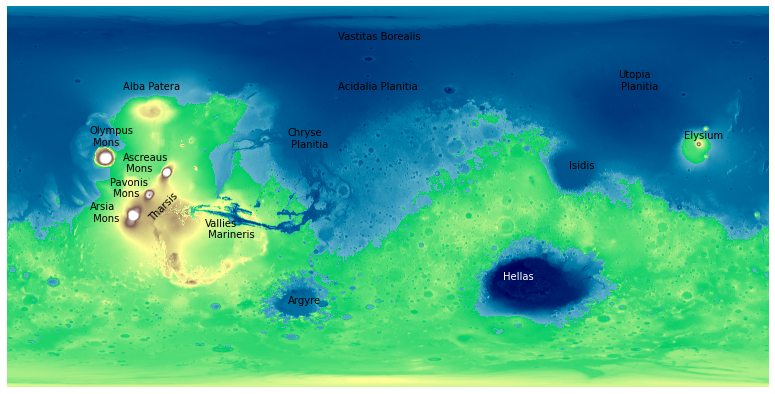

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

imgs = plt.imshow(mars[0], cmap=terrain_map, norm=norm)
plt.text(5000, 8400, "Olympus\n Mons")
plt.text(7000, 10000, "Ascreaus\n Mons")
plt.text(6200, 11500, "Pavonis\n Mons")
plt.text(5000, 13000, "Arsia\n Mons")
plt.text(8500, 13000, "Tharsis", rotation=45)
plt.text(12000, 14000, "Vallies\n Marineris")
plt.text(17000, 18000, "Argyre")
plt.text(20000, 2000, "Vastitas Borealis")
plt.text(17000, 8500, "Chryse\n Planitia")
plt.text(20000, 5000, "Acidalia Planitia")
plt.text(30000, 16500, "Hellas", color='white')
plt.text(37000, 5000, "Utopia\n Planitia")
plt.text(41000, 8000, "Elysium")
plt.text(34000, 9800, "Isidis")
plt.text(7000, 5000, "Alba Patera")
ax.axis('off')

plt.show()

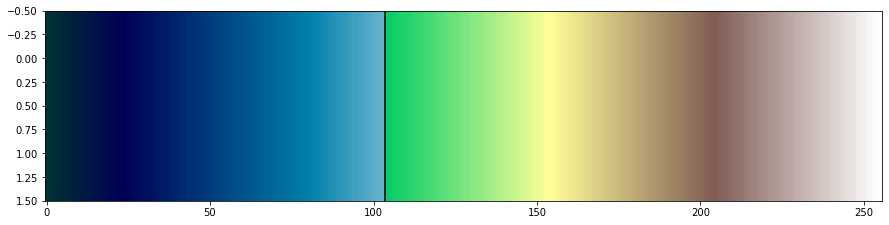

0.40390625


In [46]:
x = np.linspace(0, 1, 256)
gradient = np.vstack((x, x))

fig, ax = plt.subplots()
fig.set_size_inches(15, 3.5)
plt.imshow(gradient, aspect='auto', cmap=terrain_map)
plt.axvline(103.4, color='black')
plt.show()

print(((100 / 256) * 103.4) / 100)

In [47]:
from matplotlib.colors import Normalize

class FixPointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, sealevel=0, col_val = 0.40390625, clip=False):
        self.sealevel = sealevel
        self.col_val = col_val
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.sealevel, self.vmax], [0, self.col_val, 1]
        return np.ma.masked_array(np.interp(value, x, y))

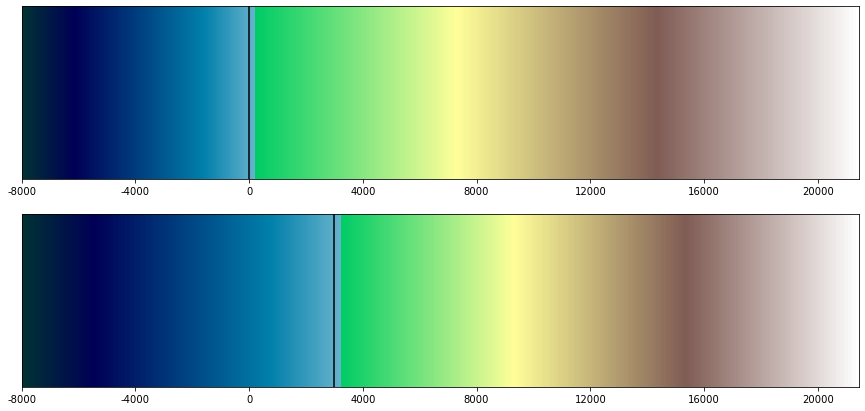

In [48]:
norm0 = FixPointNormalize(sealevel=0, vmin=np.amin(mars[0]), vmax=np.amax(mars[0]))
norm3000 = FixPointNormalize(sealevel=3000, vmin=np.amin(mars[0]), vmax=np.amax(mars[0]))
x = np.arange(np.amin(mars[0]), np.amax(mars[0]), 1)
gradient = np.vstack((x, x))

fig = plt.figure()
ax1 = plt.subplot(2,1,1)
fig.set_size_inches(15, 7)
ax1.imshow(gradient, aspect='auto', cmap=terrain_map, norm=norm0)
ax1.axvline(0+8000, color='black')
ax1.set_xticks(ticks=np.arange(0, 30000, 4000))
ax1.set_xticklabels(labels=np.arange(-8000, 22000, 4000))
ax1.get_yaxis().set_visible(False)

ax2 = plt.subplot(2,1,2)
ax2.imshow(gradient, aspect='auto', cmap=terrain_map, norm=norm3000)
ax2.axvline(3000+8000, color='black')
ax2.set_xticks(ticks=np.arange(0, 30000, 4000))
ax2.set_xticklabels(labels=np.arange(-8000, 22000, 4000))
ax2.get_yaxis().set_visible(False)
plt.show()

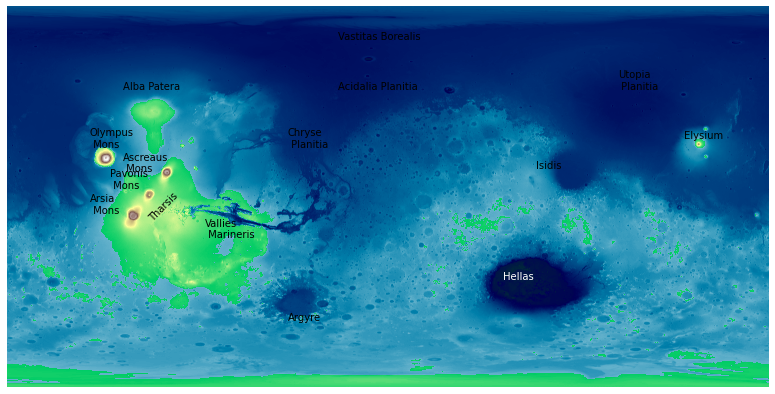

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

imgs = plt.imshow(mars[0], cmap=terrain_map, norm=norm3000)
plt.text(5000, 8400, "Olympus\n Mons")
plt.text(7000, 10000, "Ascreaus\n Mons")
plt.text(6200, 11500, "Pavonis\n Mons")
plt.text(5000, 13000, "Arsia\n Mons")
plt.text(8500, 13000, "Tharsis", rotation=45)
plt.text(12000, 14000, "Vallies\n Marineris")
plt.text(17000, 18000, "Argyre")
plt.text(20000, 2000, "Vastitas Borealis")
plt.text(17000, 8500, "Chryse\n Planitia")
plt.text(20000, 5000, "Acidalia Planitia")
plt.text(30000, 16500, "Hellas", color='white')
plt.text(37000, 5000, "Utopia\n Planitia")
plt.text(41000, 8000, "Elysium")
plt.text(34000, 9800, "Isidis")
plt.text(7000, 5000, "Alba Patera")
ax.axis('off')

plt.show()

In [ ]:
=

In [ ]:
import earthpy as et
import earthpy.spatial as es

hillshade = es.hillshade(mars[0], azimuth=250, altitude=1)
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
plt.imshow(mars[0], cmap=terrain_map, norm=norm)
plt.imshow(hillshade, cmap="Greys", alpha=0.2)
ax.axis('off')
plt.show()